In [144]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#run before importing Kmeans
import os
os.environ["OMP_NUM_THREADS"]='1'

In [145]:
#importing the dataset
dataset=pd.read_csv("Live_20210128.csv")
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [146]:
dataset.shape


(7050, 16)

In [147]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [148]:
dataset.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,7050,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [150]:
dataset.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [151]:
dataset.iloc[:,:].isnull().values.any()

True

In [152]:
dataset.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [153]:
dataset.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [154]:
dataset

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [155]:
dataset.shape

(7050, 12)

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [157]:
dataset.iloc[:,0].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [158]:
len(dataset.iloc[:,0].unique())

7050

In [159]:
len(dataset['status_id'].unique())

7050

In [160]:
dataset['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17',
       '4/21/2018 2:29', '4/18/2018 3:22', '4/18/2018 2:14',
       '4/18/2018 0:24', '4/17/2018 7:42', '4/17/2018 3:33',
       '4/11/2018 4:53', '4/10/2018 1:01', '4/9/2018 2:06',
       '4/8/2018 5:10', '4/8/2018 2:23', '4/5/2018 9:23', '4/1/2018 5:16',
       '3/30/2018 8:28', '3/26/2018 8:28', '3/23/2018 7:09',
       '3/22/2018 1:25', '3/21/2018 8:40', '3/21/2018 7:46',
       '3/20/2018 1:54', '3/20/2018 1:28', '3/20/2018 0:15',
       '3/19/2018 22:34', '3/17/2018 8:07', '3/17/2018 7:47',
       '3/12/2018 5:51', '3/9/2018 7:45', '3/9/2018 5:55',
       '3/7/2018 13:10', '3/7/2018 6:13', '3/7/2018 4:46',
       '3/5/2018 8:32', '3/5/2018 2:48', '3/2/2018 9:55',
       '2/28/2018 8:19', '2/28/2018 1:43', '2/26/2018 8:50',
       '2/25/2018 10:13', '2/21/2018 0:19', '2/19/2018 0:11',
       '2/18/2018 7:15', '2/17/2018 22:30', '2/17/2018 4:15',
       '2/15/2018 3:47', '2/14/2018 8:23', '2/13/2018 1:16',
       '2/12/2

In [161]:
len(dataset['status_published'].unique())

6913

In [162]:
dataset.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [163]:
dataset

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [164]:
len(dataset['status_type'].unique())

4

In [165]:
dataset['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [166]:
Type=dataset.status_type.value_counts()
Type

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [167]:
status_type=pd.DataFrame(Type)
status_type

,status_type
photo,4288
video,2334
status,365
link,63


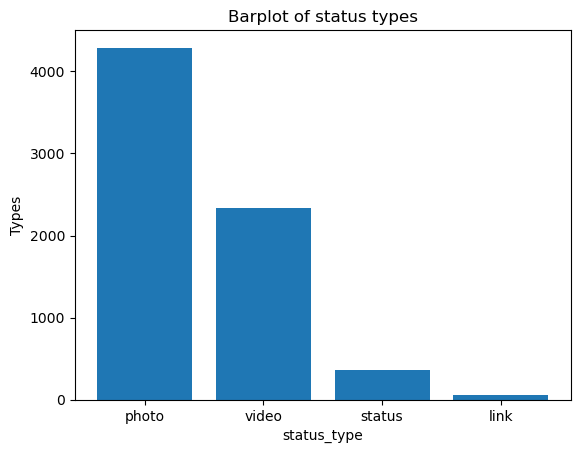

In [168]:
plt.bar(x=status_type.index,height=status_type.status_type)
plt.xlabel('status_type')
plt.ylabel('Types')
plt.title('Barplot of status types')
plt.show()

In [169]:
dataset.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

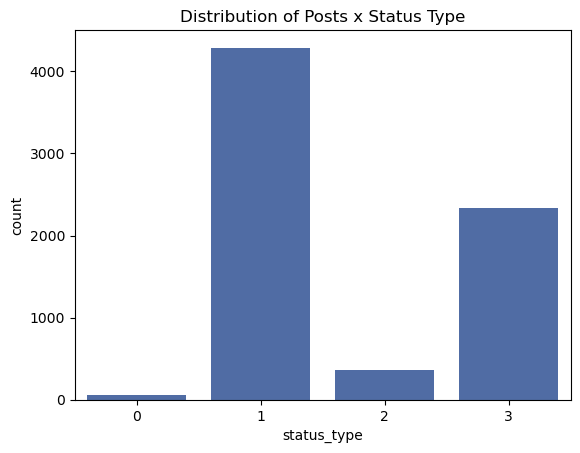

In [242]:
pal = ["#4267B2"]
pl = sns.countplot(x=dataset["status_type"], palette= pal)
pl.set_title("Distribution of Posts x Status Type")
plt.show()

In [170]:
#Converting 'status_type' to numerical values
dataset.status_type=dataset.status_type.replace(['link','photo','status','video'],[0,1,2,3])
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [171]:
X=dataset.iloc[:,1:10]
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


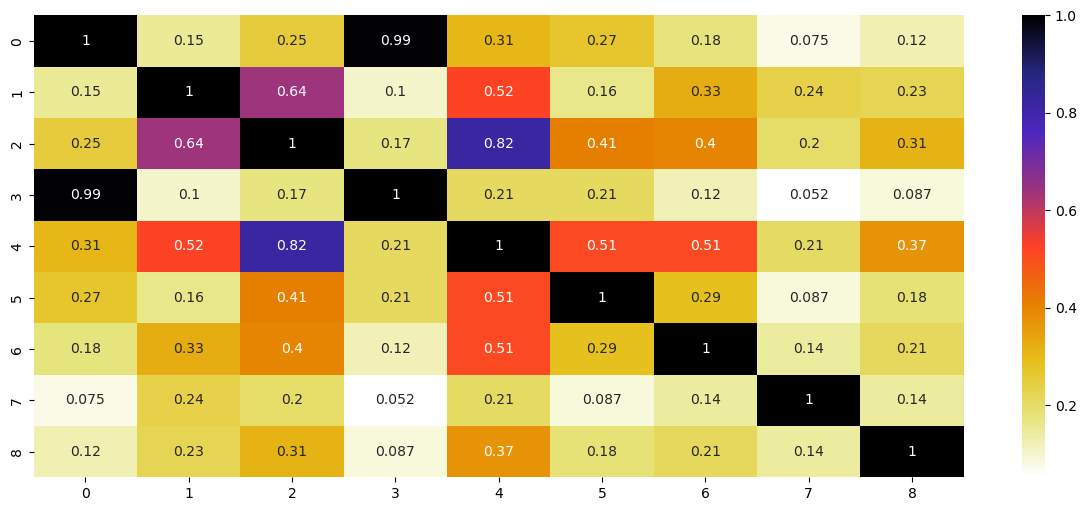

In [176]:
#Pearson correlation
plt.figure( figsize=(15, 6))
cor = np.corrcoef(X, rowvar=False)
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [177]:
import numpy as np

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the indices of correlated columns
    corr_matrix = np.corrcoef(dataset, rowvar=False)
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix[i, j]) > threshold: # we are interested in absolute coeff value
                col_corr.add(i)
                col_corr.add(j)
    return col_corr

In [178]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

4

In [179]:
corr_features

{0, 2, 3, 4}

In [227]:
X = dataset.iloc[:, [1, 5, 6, 7, 8,9]]
X

,num_reactions,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,92,3,1,1,0
1,150,0,0,0,0,0
2,227,21,1,1,0,0
3,111,0,0,0,0,0
4,213,9,0,0,0,0
...,...,...,...,...,...,...
7045,89,0,0,0,0,0
7046,16,1,0,1,0,0
7047,2,1,0,0,0,0
7048,351,2,0,0,0,0


In [228]:
y = dataset['status_type']
y

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

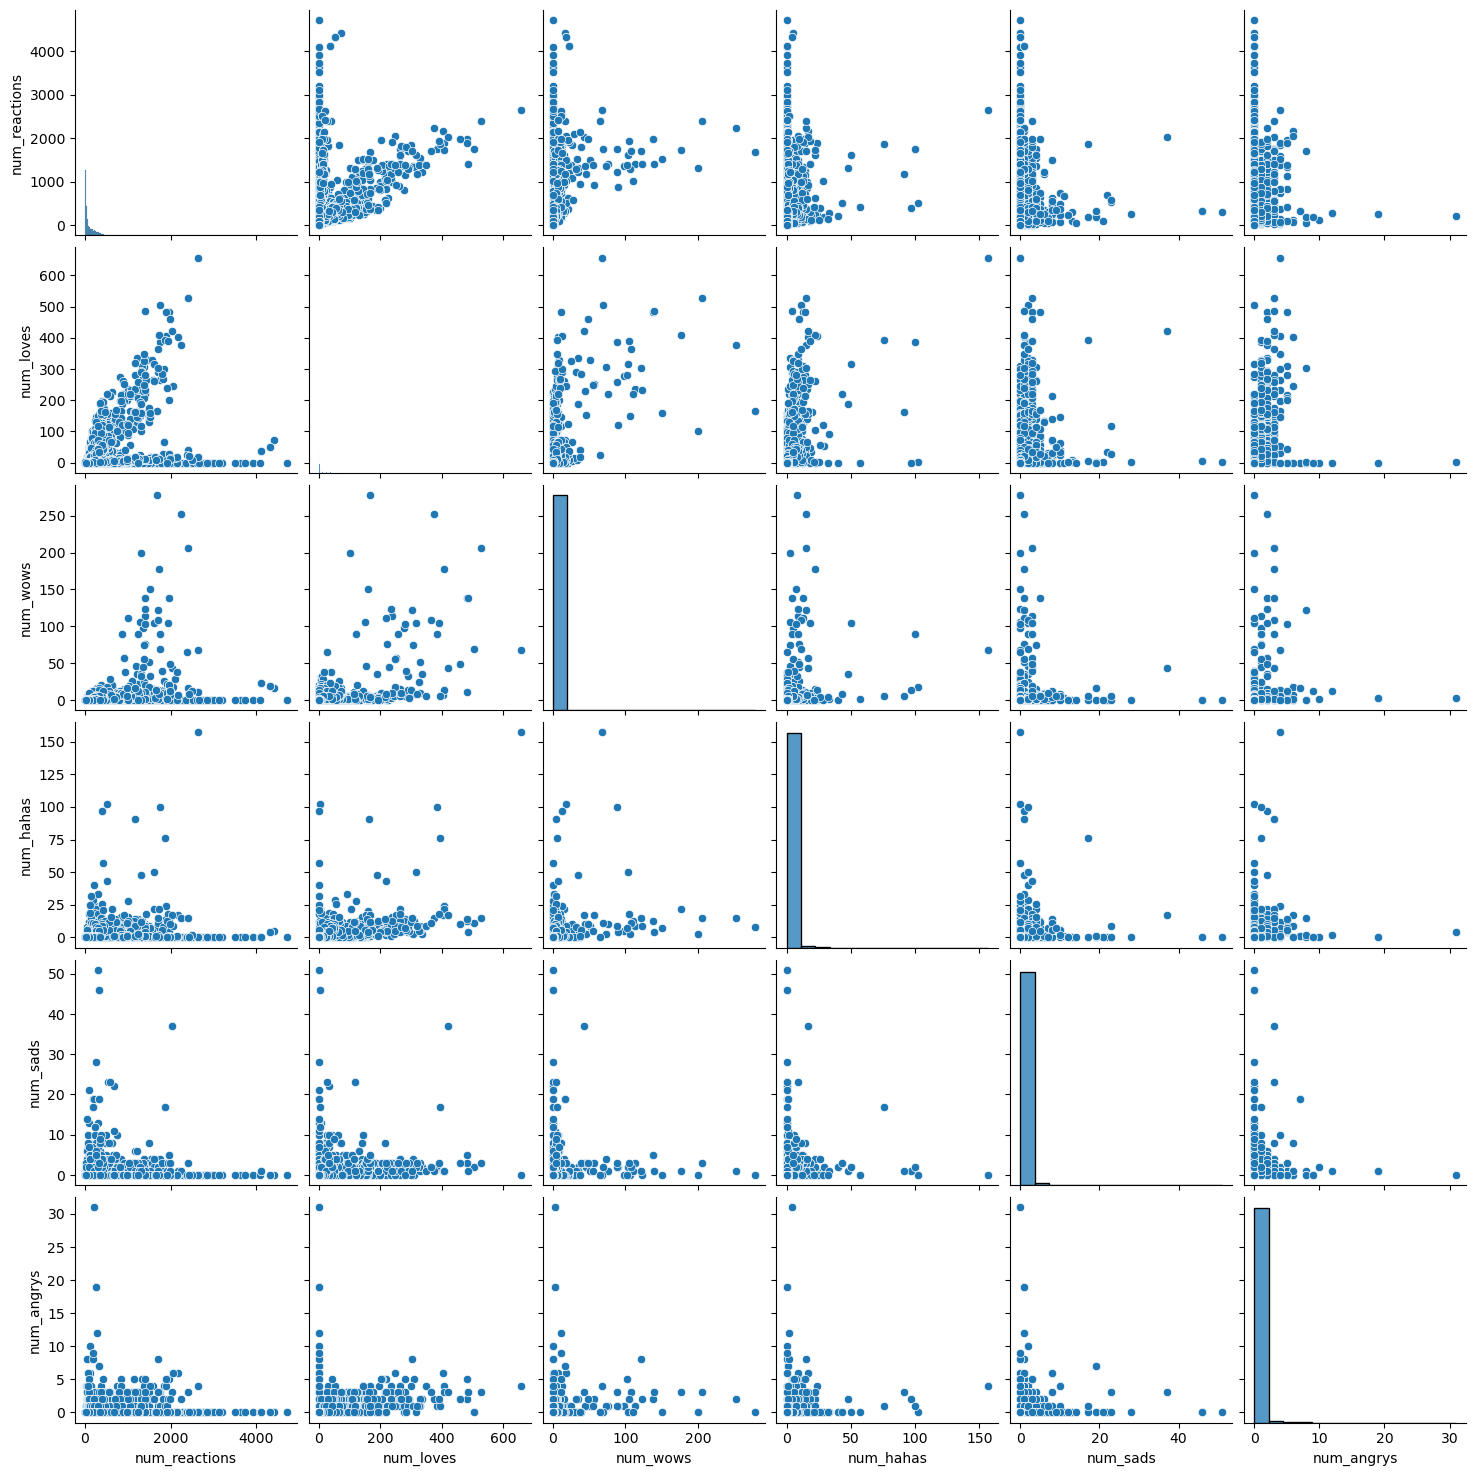

In [229]:
sns.pairplot(X)

In [230]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
X

array([[ 0.64610394,  1.98326643,  0.1961959 ,  0.07671305,  0.47357035,
        -0.15574803],
       [-0.17319166, -0.3184544 , -0.147879  , -0.17600986, -0.152587  ,
        -0.15574803],
       [-0.00673846,  0.2069384 , -0.03318737,  0.07671305, -0.152587  ,
        -0.15574803],
       ...,
       [-0.49312768, -0.29343569, -0.147879  , -0.17600986, -0.152587  ,
        -0.15574803],
       [ 0.26131603, -0.26841699, -0.147879  , -0.17600986, -0.152587  ,
        -0.15574803],
       [-0.46070173, -0.3184544 , -0.147879  , -0.17600986, -0.152587  ,
        -0.15574803]])

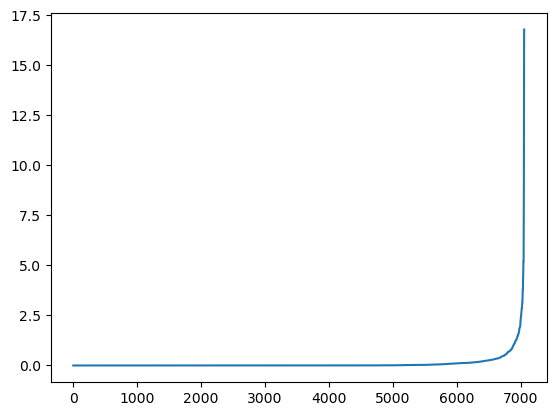

In [231]:
from sklearn.neighbors import NearestNeighbors
neighbours=NearestNeighbors(n_neighbors=2)
distances, indices=neighbours.fit(X).kneighbors(X)
distances=distances[:,1]
distances=np.sort(distances,axis=0)
plt.plot(distances)

In [232]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, min_samples=5)
y_dbscan=dbscan.fit_predict(X)


In [234]:

# Set the print options to display all elements in the array
np.set_printoptions(threshold=np.inf)

# Print the array
print(y_dbscan)

# Reset the print options to default if needed
np.set_printoptions(threshold=7050)  # Set the threshold value to your desired limit


[ 0  1  1  1  1  1 -1  2  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1 -1  1  2
  2 -1  1  1  1  2  0  1  1  1  1  0  1  1  1  1  1  1  1  0  1  2  1  1
 -1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  2  0 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  2  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  0  1  1
  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  8  1  0  1  1  1  2  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [235]:
#reducing dimensionality before visualizing
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.38387989, 0.1633136 ])

In [236]:
sum(pca.explained_variance_ratio_)

0.5471934896789148

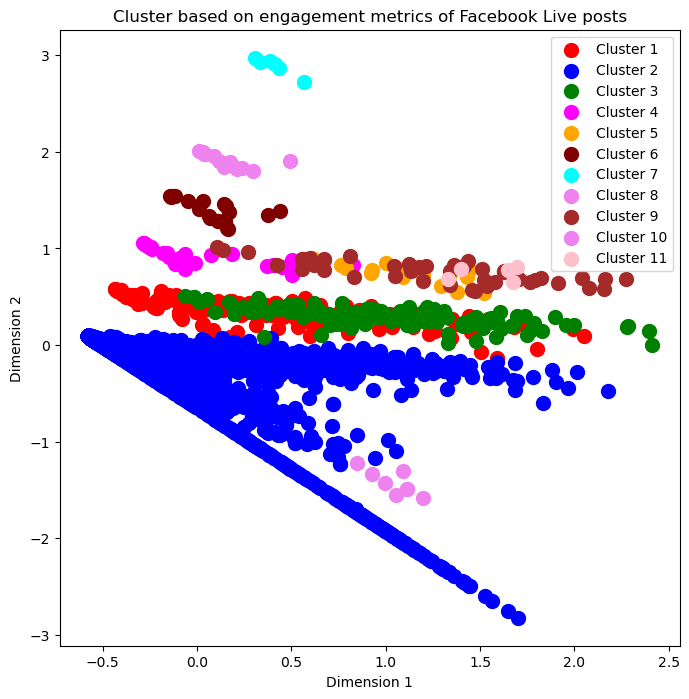

In [248]:
#Visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan==0,0],X[y_dbscan==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_dbscan==1,0],X[y_dbscan==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_dbscan==2,0],X[y_dbscan==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_dbscan==3,0],X[y_dbscan==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(X[y_dbscan==4,0],X[y_dbscan==4,1],s=100,c='orange',label='Cluster 5')
plt.scatter(X[y_dbscan==5,0],X[y_dbscan==5,1],s=100,c='maroon',label='Cluster 6')
plt.scatter(X[y_dbscan==6,0],X[y_dbscan==6,1],s=100,c='cyan',label='Cluster 7')
plt.scatter(X[y_dbscan==7,0],X[y_dbscan==7,1],s=100,c='violet',label='Cluster 8')
plt.scatter(X[y_dbscan==8,0],X[y_dbscan==8,1],s=100,c='brown',label='Cluster 9')
plt.scatter(X[y_dbscan==9,0],X[y_dbscan==9,1],s=100,c='violet',label='Cluster 10')
plt.scatter(X[y_dbscan==10,0],X[y_dbscan==10,1],s=100,c='pink',label='Cluster 11')
#plt.scatter(X[y_dbscan==-1,0],X[y_dbscan==-1,1],s=100,c='black',label='Noise')

plt.title('Cluster based on engagement metrics of Facebook Live posts')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.legend()
plt.show()

In [238]:
from sklearn.metrics import silhouette_score

# Assuming X is your dataset and y_dbscan is the cluster assignments
silhouette_avg = silhouette_score(X, y_dbscan)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.42640532591116037


In [239]:
labels = dbscan.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4091 out of 7050 samples were correctly labeled.


In [240]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.58
